## Подготовка данных

### Mixed CPPs

In [212]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 


PATH = "Datasets/"

# Определяем кодировку
def get_encoding(file: str):
    with open(file, 'rb') as file:
        encoding = chardet.detect(file.read())['encoding']
    print(encoding)
    return encoding


file_poseidon = PATH + '/Mixed CPPs/POSEIDON.csv'
df = pd.read_csv(file_poseidon, encoding=get_encoding(file_poseidon), on_bad_lines='skip') 
df.columns = [col.lower().replace(' ', '') for col in df.columns]
df.head()

Windows-1252


,peptide,cellline,cargo,pubmedid,uptake,units,conc.,time,temp.,method,type,sequence
0,Tat (49-57),Jurkat cells,Fluorescein,11087855,650,Mean Fluorescence intensity,12.5 uM,15 min,23ºC,Flow cytometry,Cellular uptake,RKKRRQRRR
1,Tat (49-56),Jurkat cells,Fluorescein,11087855,31.25,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,RKKRRQRR
2,Tat (49-55),Jurkat cells,Fluorescein,11087855,10,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,RKKRRQR
3,Tat (50-57),Jurkat cells,Fluorescein,11087855,22.5,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,KKRRQRRR
4,Tat (51-57),Jurkat cells,Fluorescein,11087855,20,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,KRRQRRR


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   peptide   2094 non-null   object
 1   cellline  2084 non-null   object
 2   cargo     2029 non-null   object
 3   pubmedid  2095 non-null   int64 
 4   uptake    2095 non-null   object
 5   units     2059 non-null   object
 6   conc.     1903 non-null   object
 7   time      2006 non-null   object
 8   temp.     1537 non-null   object
 9   method    2087 non-null   object
 10  type      2086 non-null   object
 11  sequence  2091 non-null   object
dtypes: int64(1), object(11)
memory usage: 196.5+ KB


Уберем точки из заголовков, заменим неправильный тип у uptake, также видим пропуски.

In [214]:
df.columns = df.columns.str.replace('.', '')

df['uptake'].unique()

C:\Users\lolol\AppData\Local\Temp\ipykernel_21964\3383529433.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')


array(['650', '31.25', '10', '22.5', '20', '1800', '2450', '3600',
       '16.25', '32.5', '37.5', '30', '132.5', '35', '12.5', '100', '500',
       '1225', '1700', '2650', '150', '950', '3100', '4400', '5125',
       '228 ± 54', '161 ± 21', '15 ± 6', '<10', '47 ± 7', '68 ± 2',
       '149 ± 20', '15 ± 4', '29 ± 14', '44 ± 10', '218 ± 31', '226 ± 19',
       '341 ± 58', '371 ± 56', '218 ± 23', '<30', '42 ± 12.4', '461 ± 44',
       '5670 ± 3971', '135 ± 14.6', '539 ± 80', '141 ± 54', '0.24',
       '0.26', '0.45', '0.88', '0.18', '100.0', '57', '47.5', '28',
       '19.5', '25', '15', '18', '13', '87', '94', '67', '48', '52', '64',
       '60', '50', '22', '89', '82', '56', '68', '89.5', '90', '61', '42',
       '31', '87.5', '26', '41', '21', '23', '3176', '3344', '1909',
       '4050', '1511', '1516', '1202', '1043', '1583', '1226', '1937',
       '1741', '943', '2044', '1347', '1211', '1256', '872', '1390',
       '405', '2172', '1867', '572', '475', '415', '193', '2656', '2476',
  

**Данные в этом столбце имеют неоднократный формат.**
- Запишем строки вида "980.5 / 1254.5" как результат деления
- Данные со знаком +- разделим на 2 колонки - среднее значение и средняя погрешность
- Строки со знаками больше и меньше заменим средним 
- Удалим лишние пробелы



И в итоге приведем данные к типу float

In [215]:
def remove_del(x: str):
    if '/' in x:
        a = x.split('/')
        return float(a[0].strip()) / float(a[1].strip())
    else:
        return x

In [216]:
df['uptake'] = df['uptake'].apply(lambda x: remove_del(x))

In [217]:
df['uptake'] = df['uptake'].str.replace(" ", "")

In [218]:
df[['uptake_mean', 'uptake_error']] = df['uptake'].str.split('±', expand=True)
df['uptake_mean'] = df['uptake_mean'].str.replace('<', '').astype(float)
df['uptake_error'] = df['uptake_error'].fillna(0).astype(float)


In [219]:
df['uptake_mean'] = df['uptake_mean'].astype(float)
df['uptake_error'] = df['uptake_error'].astype(float)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   peptide       2094 non-null   object 
 1   cellline      2084 non-null   object 
 2   cargo         2029 non-null   object 
 3   pubmedid      2095 non-null   int64  
 4   uptake        2092 non-null   object 
 5   units         2059 non-null   object 
 6   conc          1903 non-null   object 
 7   time          2006 non-null   object 
 8   temp          1537 non-null   object 
 9   method        2087 non-null   object 
 10  type          2086 non-null   object 
 11  sequence      2091 non-null   object 
 12  uptake_mean   2092 non-null   float64
 13  uptake_error  2095 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 229.3+ KB


Колонка time определяет сколько времени клетки находились в контакте с пептидом. Необходимо перевести ее в числовой формат.

In [221]:
df['time'].unique()

array(['15 min', '10 min', '30 min', '2h', '60 min', '18h', '3h', nan,
       '1h', '4h', '65 min', '45 min', '6h', '30 min.', '2.5 h', '48h',
       '2 h', '20 min', '24h', '70 min', '12h', '120 min', '1 h', '3 h',
       '8 hour', '48 h', '16h', '22h', '30min', '10min', '45min', '0.1h',
       '0.25h', '0.5h', '1.5h', '8h', '120min', '15min', '5min', '90min',
       '100s'], dtype=object)

Время будет указано в минутах.

In [222]:
df['time'] = df['time'].str.replace('.', '')
df['time'] = df['time'].str.replace('min', '')

C:\Users\lolol\AppData\Local\Temp\ipykernel_21964\3297525655.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['time'] = df['time'].str.replace('.', '')


In [223]:
def change_time(x: str):    # функция для перевода времени в минуты.
    if not x:
        return np.nan
    elif type(x) == float or type(x) == int:
        return x
    elif 'h' in x or 'hour' in x:
        if 'h' in x:
            a = x.split('h')[0]
            return float(a) * 60
        else:
            return float(x.split('hour')[0]) * 60
    elif 's' in x:
        return  float(x.split('s')[0]) / 60
    else:
        return x

In [224]:
df['time'] = df['time'].apply(lambda x: change_time(x))
df['time'] = df['time'].astype(float)

Далее - температура, тоже должна быть представлена в числовом формате.

In [225]:
df['temp'].unique()

array(['23ºC', '37ºC', '4ºC', nan, '37°C', '25ºC', '27ºC', '26ºC', '42ºC',
       '28ºC'], dtype=object)

In [226]:
df['temp'] = df['temp'].str.replace('ºC', '')
df['temp'] = df['temp'].str.replace('°C', '')
df['temp'] = df['temp'].astype(float)

Удалим колонку с ID из pubmedid, она не пригодится для дальнейшего анализа

In [227]:
df.drop('pubmedid', axis=1, inplace=True)

---
# Предобработка

### Дублирование

In [228]:
df.duplicated().sum()

5

In [229]:
df.drop_duplicates(inplace=True)

Удалили 5 явных дубликатов

### Работа с пропусками

In [230]:
df.isna().sum()

peptide           1
cellline         11
cargo            66
uptake            3
units            36
conc            192
time             89
temp            558
method            8
type              9
sequence          4
uptake_mean       3
uptake_error      0
dtype: int64

- Для "Peptide", "Cell line", "Cargo", "PubmedID", "Sequence", "Method", "Type" удалим пустые строки, так как пропуски могут привести к искажению результатов анализа
- Для "Uptake", "Units", "Conc.", "Time", "Temp." используем интерполяцию.

In [231]:
df.dropna(subset=['peptide', 'cellline', 'sequence', 'method', 'type', 'cargo'], inplace=True)

In [232]:
df['conc'].interpolate(method='linear', inplace=True)
df['time'].interpolate(method='linear', inplace=True)
df['temp'].interpolate(method='linear', inplace=True)
df['units'].interpolate(method='linear', inplace=True)

In [233]:
def graph_histplot_bin(dd, factor):  # Исследование количественных шкал, построение гистограммы и ящика с усами
    sns.set(style='white')
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.histplot(dd[factor], bins=20, kde=True, ax=ax[0]) 
    sns.boxplot(data=dd, y=factor, ax=ax[1], color="pink")
    
    ax[0].axvline(np.mean(dd[factor]),color='r', linestyle='-', label='Среднее')
    ax[0].axvline(np.median(dd[factor]),color='b', linestyle='--', label='Медиана')
    
    ax[0].set_xlabel(factor.capitalize(), size=13)
    ax[0].set_ylabel('')
    ax[1].set_xlabel('')
    
    ax[0].legend(loc='center right')
    
    #plt.suptitle(f'Исследование данных на нормальность шкалы {factor}', size=12, y=1.01)
    plt.show()

In [236]:
def outlier(df, col):  # Ф-я для удаления выбросов
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    med = df[col].median()

    df.drop(df[(df[col] < lower) | (df[col] > higher)].index, inplace=True)
    return df

In [238]:
df = outlier(df, 'uptake_mean')

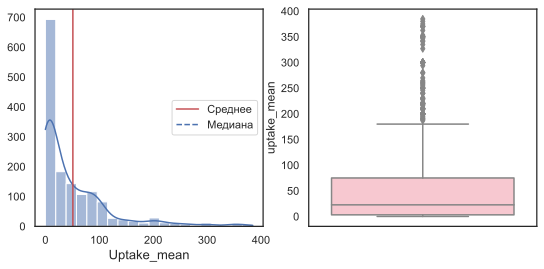

In [239]:
graph_histplot_bin(df, 'uptake_mean')

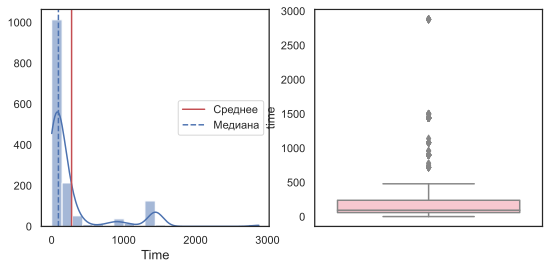

In [245]:
graph_histplot_bin(df, 'time')

In [252]:
df[df['sequence'] == 'AAVALLPAVLLALLAPRKKRRQRRRPPQ']

,peptide,cellline,cargo,uptake,units,conc,time,temp,method,type,sequence,uptake_mean,uptake_error
